In [1]:
import pandas as pd
import matplotlib
import plotly
import tkinter
import os
import numpy as np
import seaborn
import plotly.express
import kaleido
import nbformat
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [2]:
save_TS_plots = False
save_violin_plots = False
save_quantile_plots = False
locatie = 'parkhaven'
#pd.options.plotting.backend = "plotly"
pd.options.plotting.backend = "matplotlib"

In [3]:
with open('teams_path') as f:
    lines = f.readlines()
teams_path = lines[0] + '/'
root = tkinter.Tk()
my_dpi = root.winfo_fpixels('1i')

In [4]:

df = pd.read_table(teams_path + 'telecontrol/'+locatie+'.csv',delimiter = '\t')
numeric_cols = df.columns[2:]
df[numeric_cols] = df[numeric_cols].stack().str.replace(',','.').unstack()
df.head()
df.drop(df.tail(5).index,inplace = True)
df['datetime'] = pd.to_datetime(df['Datum'] + ' ' + df['Tijd (Europe/Amsterdam)'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df.head()
df = df.set_index('Datum')
df[numeric_cols] = np.where(df[numeric_cols]>=100 , np.nan, df[numeric_cols])
df['maand'] = df['datetime'].dt.strftime('%b')
cdf = df
cdf[numeric_cols[1]] = cdf[numeric_cols[1]].where(cdf[numeric_cols[1]].diff(1)!=0.0,np.nan)
df = cdf
df = df.reset_index()
df = df.set_index('datetime',drop = False)



In [5]:
df

,Datum,Tijd (Europe/Amsterdam),OW000-008/WNS3838 - gemeten waarde [°C],OW000-008/WNS7670 - gemeten waarde [mS/cm],OW000-008/WNS3838 - gemeten waarde [°C].1,OW000-008/WNS7670 - gemeten waarde [mS/cm].1,datetime,maand
datetime,,,,,,,,
2015-01-01 00:00:00,2015-01-01,00:00,4.7,0.775,3.1,0.869,2015-01-01 00:00:00,Jan
2015-01-01 00:10:00,2015-01-01,00:10,4.8,0.739,3.2,0.848,2015-01-01 00:10:00,Jan
2015-01-01 00:20:00,2015-01-01,00:20,4.9,0.727,3.2,0.844,2015-01-01 00:20:00,Jan
2015-01-01 00:30:00,2015-01-01,00:30,4.9,0.723,3.3,0.807,2015-01-01 00:30:00,Jan
2015-01-01 00:40:00,2015-01-01,00:40,4.9,0.725,3.3,0.805,2015-01-01 00:40:00,Jan
...,...,...,...,...,...,...,...,...
2022-07-04 13:00:00,2022-07-04,13:00,21.6,4.244,21.1,4.145,2022-07-04 13:00:00,Jul
2022-07-04 13:10:00,2022-07-04,13:10,21.6,4.473,21.0,4.298,2022-07-04 13:10:00,Jul
2022-07-04 13:20:00,2022-07-04,13:20,21.7,4.471,21.1,4.401,2022-07-04 13:20:00,Jul


In [6]:
%%capture
isExist = os.path.exists(teams_path+'plots/' + locatie)
if not isExist:
    os.makedirs(teams_path+'plots/' + locatie)


if save_TS_plots:

    subsets = (['2015-01-01', '2015-31-12'], ['2016-01-01', '2016-31-12'], ['2017-01-01', '2017-31-12'], ['2018-01-01', '2018-31-12'],
               ['2019-01-01', '2019-31-12'], ['2020-01-01', '2020-31-12'], ['2021-01-01','2021-31-12'], ['2022-01-01', '2022-31-12'],
               ['2015-01-01', '2022-31-12']
               )

    for subset in subsets:
        #subset = ['2015-01-01','2015-31-12']
        plot1 = df.loc[subset[0]:subset[1]].plot(
            'datetime', df.columns[2], figsize=(1920/my_dpi, 1080/my_dpi))
        axes = plot1.xaxis
        axes.set_major_locator(matplotlib.dates.MonthLocator(interval=1))
        axes.get_major_ticks()[-1].label1.set_visible(False)
        plot1.set_xlabel('Datum')
        plot1.set_ylabel('EGV')
        plot1.set_title(
            'Van ' + subset[0] + ' t/m ' + subset[1] + '\n Locatie: ' + locatie)
        plot = plot1.figure
        plot_int = plotly.tools.mpl_to_plotly(plot)
        plot_int.write_html(teams_path+"plots/" + locatie +
                            '/' + locatie + subset[0] + '_' + subset[1] + ".html")
        plot_int.write_image(teams_path+"plots/" +
                             locatie + '/' + locatie + subset[0] + '_' + subset[1] + ".png")





In [7]:
if save_violin_plots:
    plot2 = plotly.express.violin(df, x='maand', y=numeric_cols[1], points=False, 
    title='EGV verdeling per maand op locatie: ' + locatie, labels={numeric_cols[1]: 'EGV (mS/cm)'},
    category_orders={"maand": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]})
    #plot2.set_ylabel('EGV (mS/cm')
    # plot2.show()
    #plot2 = plot2.figure
    #plot_int = plotly.tools.mpl_to_plotly(plot2)
    plot2.write_html(teams_path+"plots/" + locatie +
                     '/' + locatie + "_violin.html")
    plot2.write_image(teams_path +
                         "plots/" + locatie + '/' + locatie + "_violin.png")

In [8]:
%%capture
if save_quantile_plots:
    category_orders={"maand": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]}
    df1 = df[['maand',numeric_cols[1]]]
    df2 = df1.groupby('maand').quantile([0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90])
    df3 = df2[df2.columns[0]].unstack().reindex(category_orders['maand'])
    df3[0.5].plot(color = 'black',linewidth = 2,figsize=(1920/my_dpi, 1080/my_dpi),
    title = 'Percentielen EGV (mS/cm) per maand', xlabel = 'maand', ylabel = 'EGV (mS/cm)',label = '50%')
    for i,col in enumerate(df3.columns):
        if i < len(df3.columns)-1:
            #alpha = (1-abs(col-0.5))
            alpha = col+0.1
            matplotlib.pyplot.fill_between(category_orders['maand'],df3[df3.columns[i]],df3[df3.columns[i+1]],alpha = alpha,color = 'blue',linewidth = 0,
                label = f'Percentiel {df3.columns[i]*100:g}% - {df3.columns[i+1]*100:g}%')
    matplotlib.pyplot.legend()
    matplotlib.pyplot.savefig(teams_path +
                            "plots/" + locatie + '/' + locatie + "_percentielen.png")


In [9]:
#df.tail(6*36).plot('datetime',numeric_cols[1])
series_start = df['datetime'][0]
series_end = df['datetime'][-1]
datetime_range = pd.date_range(series_start,series_end,freq = '10min')
datetime_range
df = df.reindex(datetime_range,fill_value=np.nan)



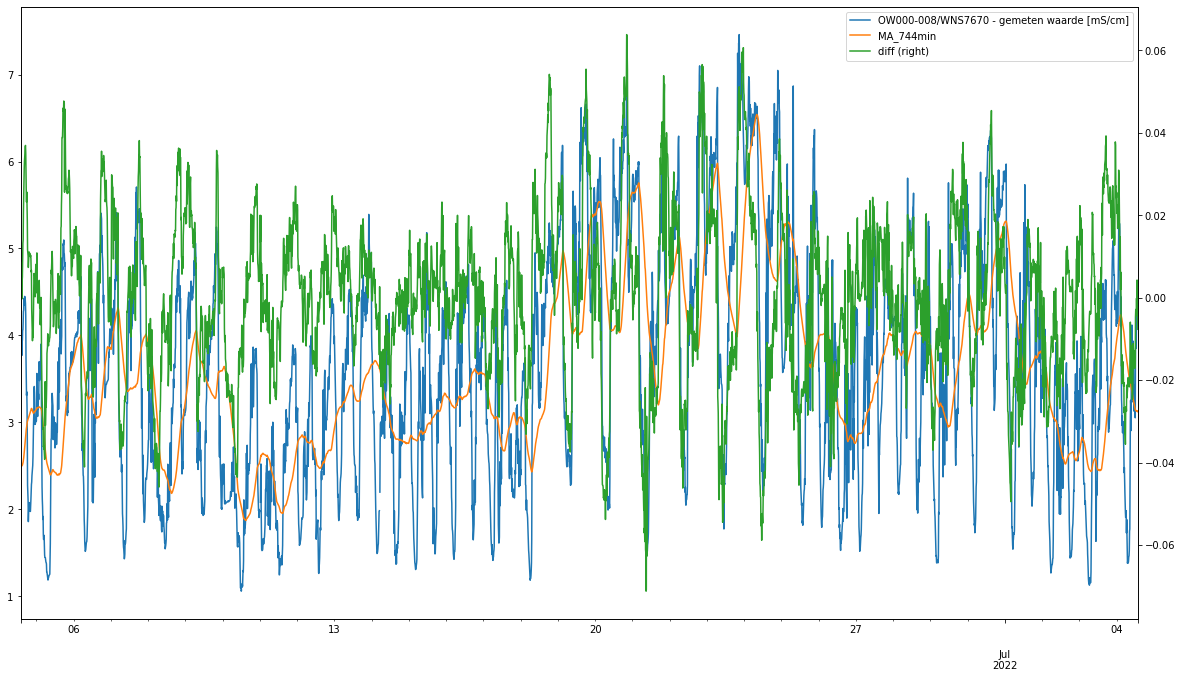

In [10]:
#recent_df = df[df['datetime'] > df['datetime'].max() - pd.Timedelta(hours=24*7)]
recent_df = df
rolling_ma = '744min'
MA_col = 'MA_' + str(rolling_ma)
recent_df[MA_col]  = recent_df[numeric_cols[1]].rolling(rolling_ma).mean()
recent_df['diff'] = recent_df[MA_col].diff()
recent_df = df[df['datetime'] > df['datetime'].max() - pd.Timedelta(hours=30*24)]
ax = recent_df.plot(y=[numeric_cols[1],MA_col],figsize=(1920/my_dpi, 1080/my_dpi))
ax2 = recent_df.plot(y='diff',secondary_y=True,ax=ax)

In [26]:
df['2022']

C:\Users\ds_sboeschoten\AppData\Local\Temp\4\ipykernel_7828\1862537852.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2022']


,Datum,Tijd (Europe/Amsterdam),OW000-008/WNS3838 - gemeten waarde [°C],OW000-008/WNS7670 - gemeten waarde [mS/cm],OW000-008/WNS3838 - gemeten waarde [°C].1,OW000-008/WNS7670 - gemeten waarde [mS/cm].1,datetime,maand,MA_744min,diff
2022-01-01 00:00:00,2022-01-01,00:00,6.4,0.960,5.9,1.100,2022-01-01 00:00:00,Jan,1.137547,-0.004493
2022-01-01 00:10:00,2022-01-01,00:10,6.4,0.963,5.9,1.098,2022-01-01 00:10:00,Jan,1.133400,-0.004147
2022-01-01 00:20:00,2022-01-01,00:20,6.4,NaN,5.9,1.095,2022-01-01 00:20:00,Jan,1.131824,-0.001576
2022-01-01 00:30:00,2022-01-01,00:30,6.4,0.962,5.9,1.090,2022-01-01 00:30:00,Jan,1.128351,-0.003473
2022-01-01 00:40:00,2022-01-01,00:40,6.4,0.956,5.9,1.084,2022-01-01 00:40:00,Jan,1.125176,-0.003176
...,...,...,...,...,...,...,...,...,...,...
2022-07-04 13:00:00,2022-07-04,13:00,21.6,4.244,21.1,4.145,2022-07-04 13:00:00,Jul,3.127347,-0.003480
2022-07-04 13:10:00,2022-07-04,13:10,21.6,4.473,21.0,4.298,2022-07-04 13:10:00,Jul,3.131600,0.004253
2022-07-04 13:20:00,2022-07-04,13:20,21.7,4.471,21.1,4.401,2022-07-04 13:20:00,Jul,3.132573,0.000973
2022-07-04 13:30:00,2022-07-04,13:30,21.6,4.534,21.1,4.379,2022-07-04 13:30:00,Jul,3.130773,-0.001800


In [27]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
recent_df = df['2022']
break_date = pd.Timestamp(recent_df['datetime'].max()) - (pd.Timedelta(hours=1.5*24))
train = recent_df[recent_df["datetime"] < break_date]
test = recent_df[recent_df["datetime"] >= break_date]





C:\Users\ds_sboeschoten\AppData\Local\Temp\4\ipykernel_7828\2592145271.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  recent_df = df['2022']


c:\Users\ds_sboeschoten\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ds_sboeschoten\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ds_sboeschoten\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

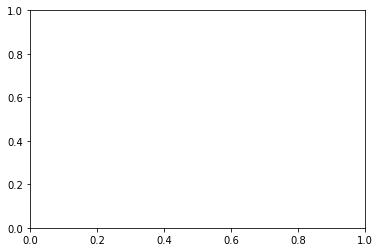

In [28]:
mdl = ARIMA(train[numeric_cols[1]],order = (1,1,1))
mdl = mdl.fit()
plot_predict(mdl,start = train['datetime'].max(),end = pd.Timestamp(train['datetime'].max()) + (pd.Timedelta(hours=1.5*24)))
#print(mdl.summary())
#mdl.plot_diagnostics()
test.plot(y=numeric_cols[1])